# Anomaly Detection in Wireless Sensor Network using DBSCAN Algorithm
# Dataset = Intel Berkley Research Lab Sensor Data
[Click Me for Dataset](https://www.kaggle.com/divyansh22/intel-berkeley-research-lab-sensor-data)

# About DBSCAN
Density-Based Clustering refers to unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two parameters:

minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.


In [23]:
# Importing the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from pylab import rcParams


##About the Dataset
This file includes a log of about 10000 million readings collected from the 54 sensors installed in the lab. There are 8 columns in this csv file and the columns included are date:yyyy-mm-dd, time:hh:mm:ss.xxx, epoch:int, moteid:int, temperature:real, humidity:real, light:real, voltage:real.


Epoch is a monotonically increasing sequence number from each mote. Two readings from the same epoch number were produced from different motes at the same time. There are some missing epochs in this data set. 

Moteids range from 1-54; data from some motes may be missing or truncated. 

Temperature is in degrees Celsius. 

Humidity is temperature corrected relative humidity, ranging from 0-100%. 

Light is in Lux (a value of 1 Lux corresponds to moonlight, 400 Lux to a bright office, and 100,000 Lux to full sunlight.) 

Voltage is expressed in volts, ranging from 2-3; the batteries, in this case, were lithium-ion cells that maintain a fairly constant voltage over their lifetime; note that variations in voltage are highly correlated with temperature.

In [24]:
# Reading the Data
df = pd.read_csv("Data_Intel.csv")
df.head(100)

,DATE,TIME,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE
0,2004-02-28,01:08:45.992524,22,1,19.1456,38.9401,45.08,2.68742
1,2004-02-28,01:08:45.992525,25,2,19.1456,38.8379,45.08,2.69964
2,2004-02-28,01:08:45.992526,58,3,19.0084,38.9401,43.24,2.69964
3,2004-02-28,01:08:45.992527,62,4,18.9986,38.9742,43.24,2.68742
4,2004-02-28,01:08:45.992528,21,5,19.5670,39.6878,121.44,2.67532
...,...,...,...,...,...,...,...,...
95,2004-02-28,01:08:45.992619,30661,96,25.9468,36.1293,412.16,2.63964
96,2004-02-28,01:08:45.992620,24447,97,31.4152,26.7160,1847.36,2.69964
97,2004-02-28,01:08:45.992621,24448,98,31.4446,26.7520,1847.36,2.69964
98,2004-02-28,01:08:45.992622,24449,99,31.5132,26.6080,1847.36,2.69964


In [25]:
a = df[df['TEMPERATURE'] > 30]
a

,DATE,TIME,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE
25,2004-02-28,01:08:45.992549,45216,26,102.1530,-3.83804,217.12,2.19970
36,2004-02-28,01:08:45.992560,46382,37,122.1530,-3.91901,11.04,2.18353
38,2004-02-28,01:08:45.992562,46384,39,122.1530,-3.91901,11.04,2.18353
39,2004-02-28,01:08:45.992563,46385,40,122.1530,-3.91901,11.04,2.18353
80,2004-02-28,01:08:45.992604,2966,81,36.5210,16.60340,309.12,2.65143
85,2004-02-28,01:08:45.992609,41117,86,122.1530,35.36870,41.40,2.17553
92,2004-02-28,01:08:45.992616,30659,93,122.1530,54.88910,441.60,2.31097
94,2004-02-28,01:08:45.992618,30660,95,122.1530,54.85780,397.44,2.31097
96,2004-02-28,01:08:45.992620,24447,97,31.4152,26.71600,1847.36,2.69964
97,2004-02-28,01:08:45.992621,24448,98,31.4446,26.75200,1847.36,2.69964


# Info about the Data

In [26]:
df.describe()

,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,22838.400000,50.500000,28.192670,38.055877,508.074600,2.560392
std,15197.196261,29.011492,25.414741,11.338844,720.276375,0.140186
min,21.000000,1.000000,16.842600,-3.919010,0.460000,2.175530
25%,11563.750000,25.750000,19.361200,35.498525,3.680000,2.454210
50%,23061.000000,50.500000,20.948800,39.738700,103.040000,2.593540
75%,32701.000000,75.250000,24.087250,42.779600,713.920000,2.663320
max,55082.000000,100.000000,122.153000,54.889100,1847.360000,2.762420


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         100 non-null    object 
 1   TIME         100 non-null    object 
 2   EPOCH        100 non-null    int64  
 3   NODEID       100 non-null    int64  
 4   TEMPERATURE  100 non-null    float64
 5   HUMIDITY     100 non-null    float64
 6   LIGHT        100 non-null    float64
 7   VOLTAGE      100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


# Plotting the Initial Data Values

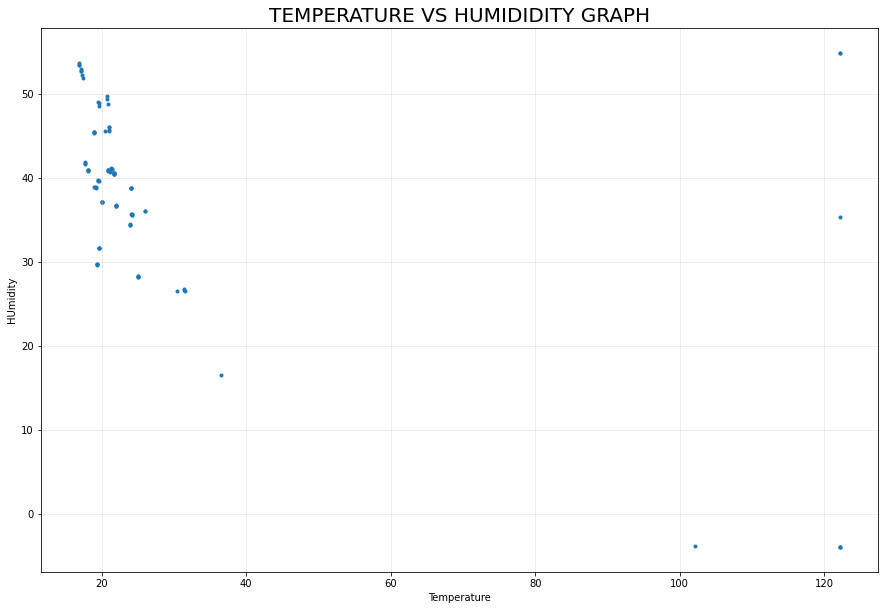

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(df['TEMPERATURE'], df['HUMIDITY'],
           marker = '.')
plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.title('TEMPERATURE VS HUMIDIDITY GRAPH', fontsize=20)
plt.xlabel('Temperature')
plt.ylabel('HUmidity')
plt.show()

In [29]:
# Importing DBSCAN from sklearn
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(30)


In [30]:
X = df.iloc[:, [4, 5]].values # selecting all entries of Temperature and Humidity Column
X[0:50] # printing first 10 entries of the list

array([[ 19.1456 ,  38.9401 ],
       [ 19.1456 ,  38.8379 ],
       [ 19.0084 ,  38.9401 ],
       [ 18.9986 ,  38.9742 ],
       [ 19.567  ,  39.6878 ],
       [ 19.5376 ,  39.7557 ],
       [ 19.4788 ,  39.6878 ],
       [ 19.4494 ,  39.7217 ],
       [ 21.2036 ,  40.7706 ],
       [ 19.6944 ,  48.5139 ],
       [ 19.5768 ,  48.9675 ],
       [ 19.5376 ,  49.0969 ],
       [ 21.38   ,  41.1078 ],
       [ 21.3702 ,  41.1078 ],
       [ 21.3212 ,  41.1078 ],
       [ 21.3114 ,  41.1751 ],
       [ 21.6838 ,  40.568  ],
       [ 21.6936 ,  40.5004 ],
       [ 21.6936 ,  40.568  ],
       [ 21.6936 ,  40.568  ],
       [ 21.6936 ,  40.5342 ],
       [ 21.6936 ,  40.568  ],
       [ 21.6936 ,  40.5004 ],
       [ 21.6838 ,  40.5342 ],
       [ 20.8214 ,  48.8056 ],
       [102.153  ,  -3.83804],
       [ 20.7332 ,  49.7424 ],
       [ 20.694  ,  49.4199 ],
       [ 19.5768 ,  31.6664 ],
       [ 19.5768 ,  31.6664 ],
       [ 19.5768 ,  31.6312 ],
       [ 19.567  ,  31.6664 ],
       [

# Training the Model

In [31]:
model = IsolationForest(max_samples = 10, random_state=random_state).fit(X) 
model

IsolationForest(max_samples=10,
                random_state=RandomState(MT19937) at 0x7FEBBF540840)

# Prining labels
*   **-ve points represents the outliers they do not fall under any cluster**
*   
others denote the cluster 0th, 1th, 2th,...8th cluster



In [32]:
labels = model.predict(X)
for i in range (0,100):
  print("Iteration : {}  Label : {}".format(i,labels[i]))

Iteration : 0  Label : 1
Iteration : 1  Label : 1
Iteration : 2  Label : 1
Iteration : 3  Label : 1
Iteration : 4  Label : 1
Iteration : 5  Label : 1
Iteration : 6  Label : 1
Iteration : 7  Label : 1
Iteration : 8  Label : 1
Iteration : 9  Label : 1
Iteration : 10  Label : 1
Iteration : 11  Label : 1
Iteration : 12  Label : 1
Iteration : 13  Label : 1
Iteration : 14  Label : 1
Iteration : 15  Label : 1
Iteration : 16  Label : 1
Iteration : 17  Label : 1
Iteration : 18  Label : 1
Iteration : 19  Label : 1
Iteration : 20  Label : 1
Iteration : 21  Label : 1
Iteration : 22  Label : 1
Iteration : 23  Label : 1
Iteration : 24  Label : 1
Iteration : 25  Label : -1
Iteration : 26  Label : -1
Iteration : 27  Label : 1
Iteration : 28  Label : 1
Iteration : 29  Label : 1
Iteration : 30  Label : 1
Iteration : 31  Label : 1
Iteration : 32  Label : 1
Iteration : 33  Label : 1
Iteration : 34  Label : 1
Iteration : 35  Label : 1
Iteration : 36  Label : -1
Iteration : 37  Label : 1
Iteration : 38  Lab

# Visualizing Results
Separate outliers from cluster data


In [33]:
outliers_df = df[model.predict(X)== -1] #-1 stands for outlier
clusters_df = df[model.predict(X) != -1]

In [34]:
outliers_df

,DATE,TIME,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE
25,2004-02-28,01:08:45.992549,45216,26,102.1530,-3.83804,217.12,2.19970
26,2004-02-28,01:08:45.992550,45217,27,20.7332,49.74240,90.16,2.49546
36,2004-02-28,01:08:45.992560,46382,37,122.1530,-3.91901,11.04,2.18353
38,2004-02-28,01:08:45.992562,46384,39,122.1530,-3.91901,11.04,2.18353
39,2004-02-28,01:08:45.992563,46385,40,122.1530,-3.91901,11.04,2.18353
56,2004-02-28,01:08:45.992580,38233,57,16.8426,53.66350,1847.36,2.42416
57,2004-02-28,01:08:45.992581,38234,58,16.8916,53.47420,1847.36,2.42416
58,2004-02-28,01:08:45.992582,38235,59,16.9112,53.50580,1847.36,2.43410
59,2004-02-28,01:08:45.992583,38236,60,17.1072,52.93680,1847.36,2.43410
60,2004-02-28,01:08:45.992584,38237,61,17.1464,52.74670,1847.36,2.43410


In [35]:
ls = list(outliers_df['NODEID'])
for i in range(0,len(outliers_df)):
  if(i != len(outliers_df)-1):
    print("Nodes[{}]".format(ls[i]-1),end=",")
  else:
    print("Nodes[{}]".format(ls[i]-1),end="")

Nodes[25],Nodes[26],Nodes[36],Nodes[38],Nodes[39],Nodes[56],Nodes[57],Nodes[58],Nodes[59],Nodes[60],Nodes[61],Nodes[62],Nodes[63],Nodes[76],Nodes[77],Nodes[78],Nodes[79],Nodes[80],Nodes[85],Nodes[92],Nodes[94],Nodes[96],Nodes[97],Nodes[98],Nodes[99]

In [36]:
for i in range(0,len(ls)):
    ls[i] = ls[i]-2
Anomalies_list = [1 for i in range(0,100)]
for i in range(0,100):
    if i in ls:
        Anomalies_list[i] = 0
#print(len(Anomalies_list))
print(Anomalies_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]


In [37]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 25 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         25 non-null     object 
 1   TIME         25 non-null     object 
 2   EPOCH        25 non-null     int64  
 3   NODEID       25 non-null     int64  
 4   TEMPERATURE  25 non-null     float64
 5   HUMIDITY     25 non-null     float64
 6   LIGHT        25 non-null     float64
 7   VOLTAGE      25 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.8+ KB


In [38]:
clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 95
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         75 non-null     object 
 1   TIME         75 non-null     object 
 2   EPOCH        75 non-null     int64  
 3   NODEID       75 non-null     int64  
 4   TEMPERATURE  75 non-null     float64
 5   HUMIDITY     75 non-null     float64
 6   LIGHT        75 non-null     float64
 7   VOLTAGE      75 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.3+ KB


In [39]:
colors = model.predict(X)
colors_clusters = colors[colors != -1]
colors_outliers = 'yellow' # for outliers set yellow color

# Core Points, Number of Clusters


In [40]:
#Get the info about clusters
clusters = Counter(model.predict(X))
print(clusters)
print(df[model.predict(X) == -1].head(10))
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({1: 75, -1: 25})
          DATE             TIME  EPOCH  NODEID  TEMPERATURE  HUMIDITY  \
25  2004-02-28  01:08:45.992549  45216      26     102.1530  -3.83804   
26  2004-02-28  01:08:45.992550  45217      27      20.7332  49.74240   
36  2004-02-28  01:08:45.992560  46382      37     122.1530  -3.91901   
38  2004-02-28  01:08:45.992562  46384      39     122.1530  -3.91901   
39  2004-02-28  01:08:45.992563  46385      40     122.1530  -3.91901   
56  2004-02-28  01:08:45.992580  38233      57      16.8426  53.66350   
57  2004-02-28  01:08:45.992581  38234      58      16.8916  53.47420   
58  2004-02-28  01:08:45.992582  38235      59      16.9112  53.50580   
59  2004-02-28  01:08:45.992583  38236      60      17.1072  52.93680   
60  2004-02-28  01:08:45.992584  38237      61      17.1464  52.74670   

      LIGHT  VOLTAGE  
25   217.12  2.19970  
26    90.16  2.49546  
36    11.04  2.18353  
38    11.04  2.18353  
39    11.04  2.18353  
56  1847.36  2.42416  
57  1847.3

In [41]:
df.columns

Index(['DATE', 'TIME', 'EPOCH', 'NODEID', 'TEMPERATURE', 'HUMIDITY', 'LIGHT',
       'VOLTAGE'],
      dtype='object')

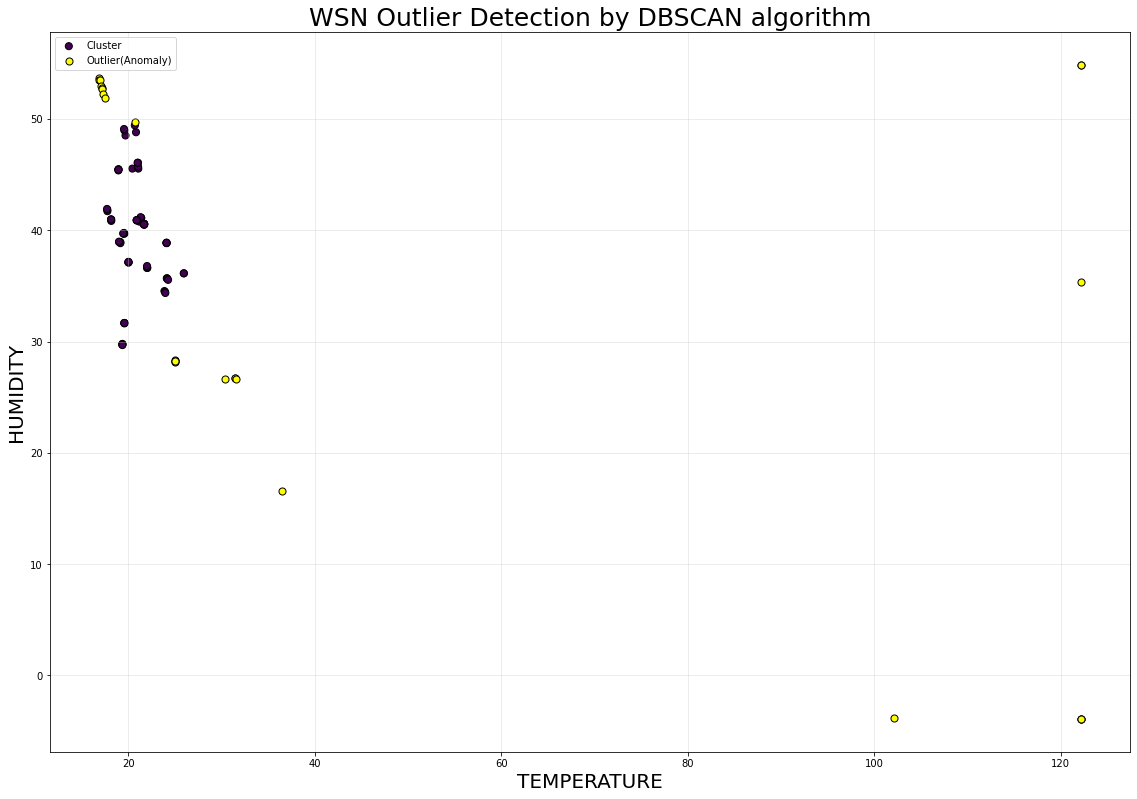

In [42]:
# Black Point shows the Outliers
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['TEMPERATURE'], clusters_df['HUMIDITY'],
           c = colors_clusters, edgecolors='black', s=50,label = "Cluster")
ax.scatter(outliers_df['TEMPERATURE'], outliers_df['HUMIDITY'],
           c = colors_outliers, edgecolors='black', s=50,label = "Outlier(Anomaly)")

ax.set_xlabel('TEMPERATURE', fontsize=20)
ax.set_ylabel('HUMIDITY', fontsize=20) 

plt.title('WSN Outlier Detection by DBSCAN algorithm', fontsize=25)

plt.grid(which='major', color='#cccccc', alpha = 0.45)
plt.legend()
plt.show()

## Data Transmission after Anomaly Detection
for data transmission, we have to basically transfer the message signal to the base station.
For that we have to consider all type of energies that are dissipated during transmission.

1.   Transmitter Circuitry Energy ( Etx)
2.   Receiver Circuitry Energy ( Erx)
3.   Amplification Energy( Eamp)

---
We consider followinfg initial energy of each node.


1.   Transmission - 50nj/bit
2.   Receiving - 50nj/bit
3.   Amplification - 100pj/bit/m^2


In [44]:
# Node Class
class Node:
    def __init__(self):
        self.position = {
            'x': None,
            'y': None
        }[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 14]]
        self.is_CH = False
        self.power = 0.75
        self.is_dead = False
        self.last_CH_round = None
        self.closest_CH = {
            'node_id': None,
            'dist': None
        }

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [ ]:
# Network class
class Network:
    def __init__(self):
        self.dimentions = {
            'x': 100,
            'y': 100
        }
        self.no_of_nodes = 100
        self.percentage_CH = 0.05 # percentage of nodes to become CH in each round
        self.nodes = [Node() for i in range(self.no_of_nodes)]
        self.current_round_number = 0
        for i in range(self.no_of_nodes):

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
print(distances[0:50])
distances = distances[:,3]
plt.plot(distances)
plt.show()

In [ ]:
model.fit_predict

In [ ]:
!pip install kneed

In [ ]:
y = distances
x = range(0, len(y))

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('TEMPERATURE')
plt.ylabel('HUMMIDITY')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')